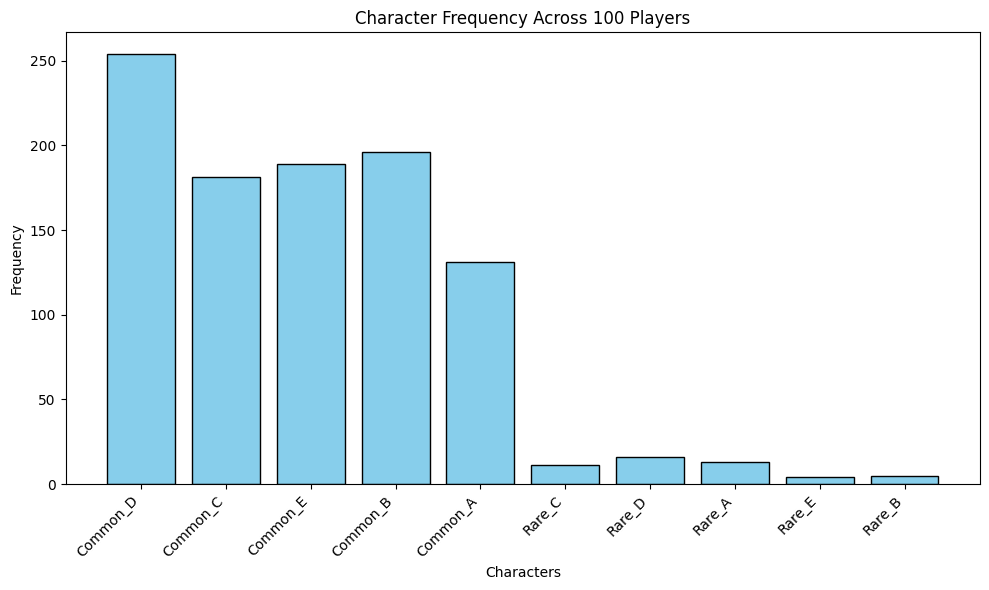

In [4]:
import csv
import matplotlib.pyplot as plt
from collections import Counter

# Membaca file CSV
file_name = "gacha_results.csv"
# Mengumpulkan semua karakter dari file CSV

all_characters = []
with open(file_name, "r") as file:
    reader = csv.reader(file)
    header = next(reader)  # Membaca header
    for row in reader:
        all_characters.extend(row[1:])  # Semua karakter di kolom pull

# Menghitung frekuensi karakter
character_counts = Counter(all_characters)

# Membuat grafik
characters = list(character_counts.keys())
frequencies = list(character_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(characters, frequencies, color='skyblue', edgecolor='black')
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.title("Character Frequency Across 100 Players")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Menampilkan grafik
plt.show()



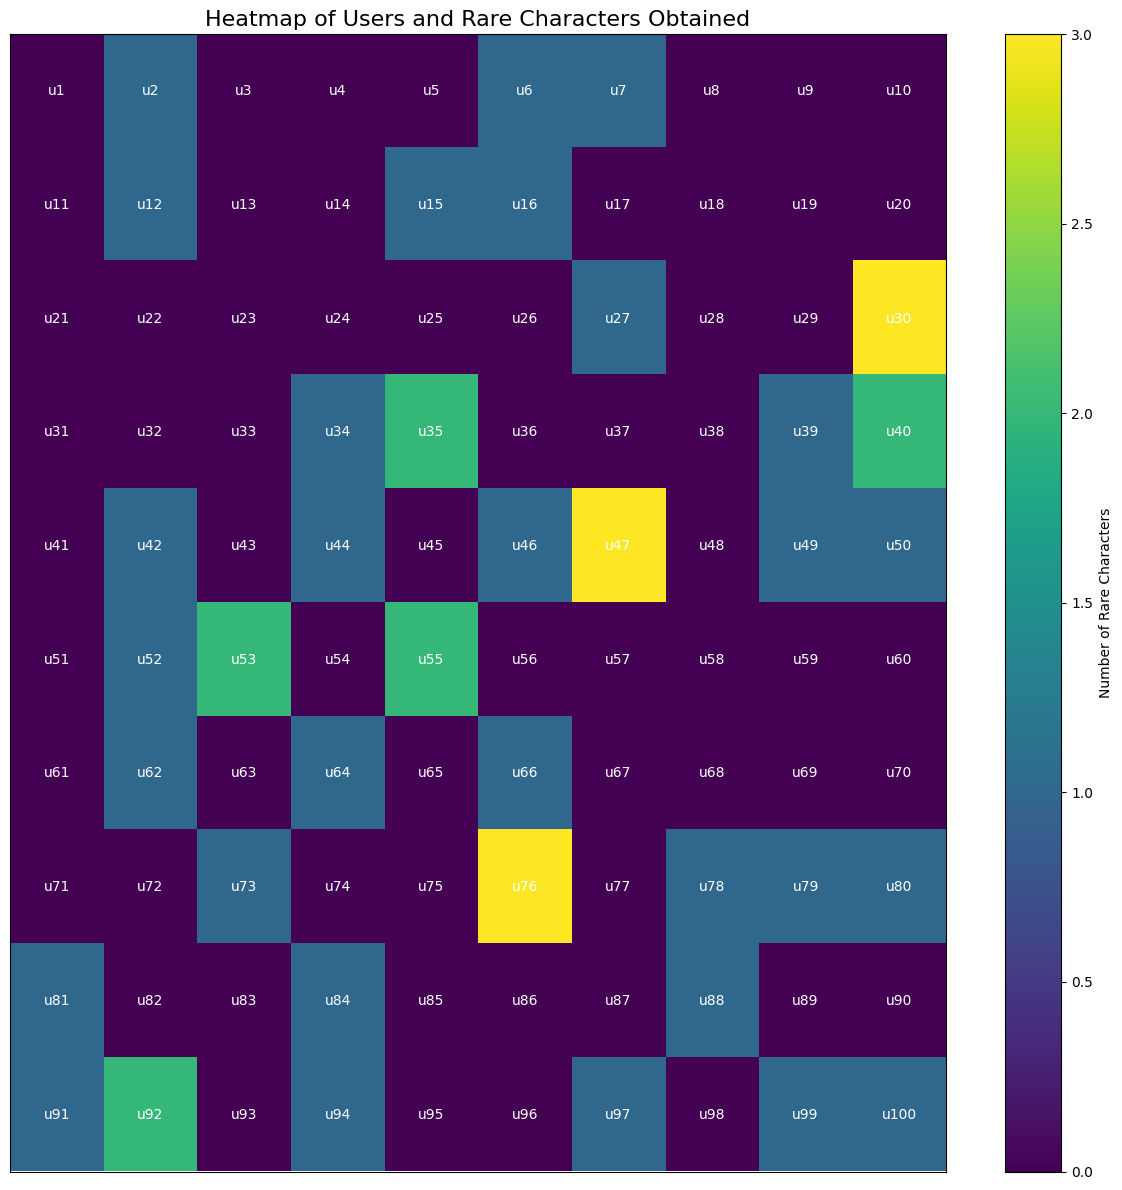

In [13]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Membaca file CSV
file_name = "gacha_results.csv"

# Definisi karakter rare
rare_characters = {"Rare_A", "Rare_B", "Rare_C", "Rare_D", "Rare_E"}

# Menghitung jumlah rare untuk setiap user
user_rare_counts = {}
with open(file_name, "r") as file:
    reader = csv.reader(file)
    header = next(reader)  # Membaca header
    for row in reader:
        user_id = int(row[0])  # Konversi ID user ke integer
        pulls = row[1:]
        rare_count = sum(1 for pull in pulls if pull in rare_characters)
        user_rare_counts[user_id] = rare_count

# Menyiapkan data untuk heatmap
users = sorted(user_rare_counts.keys())  # Pastikan urut
rare_counts = [user_rare_counts[user] for user in users]

# Membentuk data menjadi matriks (misal, 10 baris x 10 kolom untuk 100 user)
matrix_size = 10
heatmap_data = np.array(rare_counts).reshape(matrix_size, matrix_size)

# Membuat visualisasi kotak besar dengan kotak kecil di dalamnya
plt.figure(figsize=(12, 12))  # Ukuran gambar yang besar
plt.imshow(heatmap_data, cmap="viridis", aspect="auto")  # `viridis` untuk gradasi warna
plt.colorbar(label="Number of Rare Characters", orientation="vertical")

# Menambahkan label user ID ke dalam kotak kecil
for i in range(matrix_size):
    for j in range(matrix_size):
        user_id = i * matrix_size + j + 1  # Menentukan ID user (u1 hingga u100)
        plt.text(j, i, f"u{user_id}", ha="center", va="center", color="white", fontsize=10)

# Menghilangkan label sumbu x dan y
plt.xticks([])
plt.yticks([])

# Memberikan judul
plt.title("Heatmap of Users and Rare Characters Obtained", fontsize=16)

# Menampilkan gambar
plt.tight_layout()
plt.show()
